In [13]:

import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd
from math import floor
import seaborn as sns
from numpy.linalg import norm
from numpy import exp, sin
from math import pi
from floquet_simulations.plot_functions import PlotParams
figsize=(4.1,4.1)
fontsize = 10
cm_unit = 1/2.54
PlotParams(fontsize=fontsize)

def EVNormed(V,q,n,lmax):
    evals, evecs = eig(H(V, q, lmax))
    evals, evecs = list(zip(*(sorted(zip(evals,evecs.transpose())))))
    return evecs[n]

def BlochFunc(V0, n, q, lmax, x):
    return sum([exp(pi*1j*x*(q+2*l))*EVNormed(V0,q,n,lmax)[l+lmax] for l in range(-lmax, lmax+1)])

def H(V0, q, lmax):
    matrix = np.diag([(2*i+q)**2 + V0/2 for i in range(-lmax, lmax+1)],0)         
    matrix = matrix + np.diag([-V0/4]*(2*lmax ), -1) + np.diag([-V0/4]*(2*lmax), 1)
    return matrix


def evals_df(V0, lmax):
    df = pd.DataFrame(columns=['q']+['b'+str(i) for i in range(2*lmax + 1)])

    qlist = np.linspace(-2,2,401, endpoint=True)
    for i, q in enumerate(qlist):
        evals, _ = eig(H(V0, q, lmax))
        evals = np.sort(evals)
        df.loc[i] = np.concatenate([np.array([q]), evals])
    return df

print(H(5, 0.5, 3))

[[32.75 -1.25  0.    0.    0.    0.    0.  ]
 [-1.25 14.75 -1.25  0.    0.    0.    0.  ]
 [ 0.   -1.25  4.75 -1.25  0.    0.    0.  ]
 [ 0.    0.   -1.25  2.75 -1.25  0.    0.  ]
 [ 0.    0.    0.   -1.25  8.75 -1.25  0.  ]
 [ 0.    0.    0.    0.   -1.25 22.75 -1.25]
 [ 0.    0.    0.    0.    0.   -1.25 44.75]]


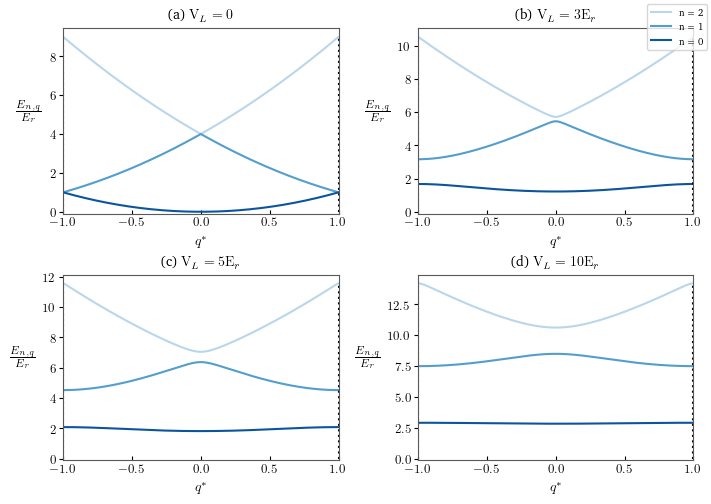

In [10]:

nband = 3
V0_lst = [0, 3, 5, 10]
lmax = 3
sz = 7
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(sz, sz/1.42), constrained_layout=True,)

colours = [sns.color_palette("Blues")[5], sns.color_palette("Blues")[3], 
           sns.color_palette("Blues")[1]]

titles = [r'(a) $\mathrm{V}_L = 0$', r'(b) $\mathrm{V}_L = 3 \mathrm{E}_r$', 
          r'(c) $\mathrm{V}_L = 5 \mathrm{E}_r$', r'(d) $\mathrm{V}_L = 10 \mathrm{E}_r$']
for j, V0 in enumerate(V0_lst):
    b = j%2
    a = floor(j/2)
    df = evals_df(V0, lmax)
    for i in reversed(range(nband)): 
        ax[a,b].plot(df.q, df['b'+str(i)], label='n = '+str(i), color=colours[i])
    ax[a,b].set_xlabel(r'$q^*$', fontsize=10)
    ax[a,b].set_ylabel(r'$\frac{E_{n,q}}{E_r}$', rotation=0, fontsize=11,labelpad=15)
    ax[a,b].set_title(titles[j])
    ax[a,b].vlines([-1,1], 0, df.iloc[:,1:nband+1].max().max(),
                       colors='k', linestyles='dotted')
    ax[a,b].set_xlim([-1,1])
    ax[a,b].set_ylim(ymin=-0.1)
handles, labels = ax[0,0].get_legend_handles_labels()    
fig.legend(handles, labels)
# fig.savefig('/Users/Georgia/Dropbox/phd/own_notes/first_year_report/bandstructure.pdf', 
#             format='pdf', bbox_inches='tight')

plt.show()

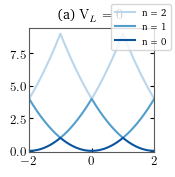

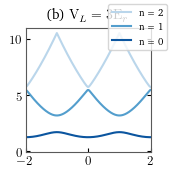

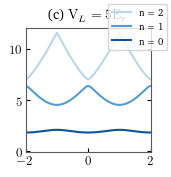

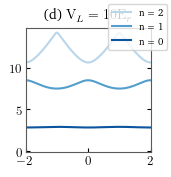

In [11]:
nband = 3
V0_lst = [0, 3, 5, 10]
lmax = 3
titles = [r'(a) $\mathrm{V}_L = 0$', r'(b) $\mathrm{V}_L = 3 \mathrm{E}_r$', 
            r'(c) $\mathrm{V}_L = 5 \mathrm{E}_r$', r'(d) $\mathrm{V}_L = 10 \mathrm{E}_r$']

xlabel_coords = [0.52,-0.11]
ylabel_coords = [-0.14,0.5]
xaxis_tick_pos=np.array([-1, 0, 1])
xaxis_tick_labels = [r"$-k_L$", r"$0$", r"$k_L$"]


for j, V0 in enumerate(V0_lst):
    fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
    df = evals_df(V0, lmax)
    for i in reversed(range(nband)): 
        ax.plot(df.q, df['b'+str(i)], label='n = '+str(i), color=colours[i])

    ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
    ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


    # ax.set_ylabel('$q$', rotation=0)
    # ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])

    # ax.set_xlabel("$\frac{E_{n,q}}{E_r}$")
    # ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
    # ax.set_xticks(xaxis_tick_pos)
    # ax.set_xticklabels(xaxis_tick_labels)#, font="stix", fontsize=fontsize*0.9)


    ax.set_title(titles[j])
    ax.set_xlim([-2,2])
    ax.set_ylim(ymin=-0.1)
    handles, labels = ax.get_legend_handles_labels()    
    fig.legend(handles, labels)
# fig.savefig('/Users/Georgia/Dropbox/phd/own_notes/first_year_report/bandstructure.pdf', 
#             format='pdf', bbox_inches='tight')

    plt.show()

### Plane waves

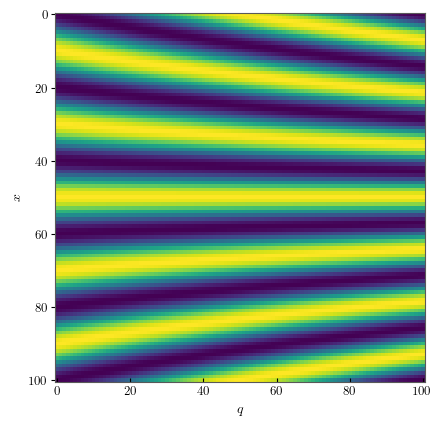

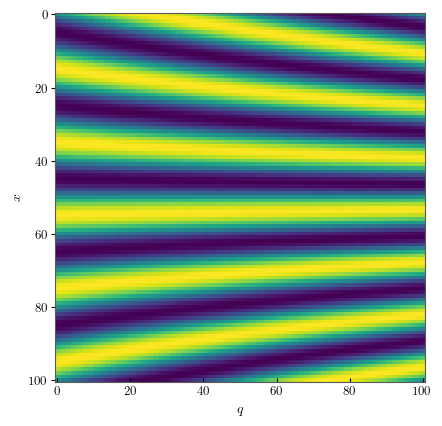

In [29]:
a = 1
l = 3
q = np.linspace(-np.pi/a, np.pi/a, 101)
x = np.linspace(-1, 1, 101)
pw = np.array([[np.exp(1j*(2*np.pi*l/a + qq)*xx) for qq in q] for xx in x], dtype=np.complex128)
for func in [np.real, np.imag]:
    fig, ax = plt.subplots()
    plt.imshow(func(pw), interpolation='none')
    ax.set_xlabel('$q$')
    ax.set_ylabel("$x$")
    plt.show()


In [ ]:

#%%
'''Wannier functions'''



#%%
n = 1
#q = 1
v0 = 8
lmax = 6
x = np.linspace(0,2,200)


colours = ['darkolivegreen', 'salmon', 
           'steelblue','goldenrod']

colours = ['0.18']*4

linestyle = [':', '--', '-.', '-']

qs = [0, 1]
ns = [0, 1]
sz = 7
fig, ax = plt.subplots(nrows=len(ns), ncols=len(qs), 
                       sharey=True, sharex = True, 
                       figsize=(sz, sz/1.62),
                       constrained_layout=True,)

for num1, n, in enumerate(ns):
    for num2, q in enumerate(qs):
        Bloch = [BlochFunc(V0, n, q, lmax, i) for i in x]
        
        ax[num1, num2].plot(x, list(map(lambda i : (np.linalg.norm(i))**2, Bloch)), 
             label=r'$| \varphi_{n,q} (x^*) |^2$', color=colours[0], 
             linestyle=linestyle[0])
        ax[num1, num2].plot(x, np.real(Bloch), 
          label=r'$\mathrm{Real}(\varphi_{n,q} (x^*))$', 
             color=colours[1], linestyle=linestyle[1])
        ax[num1, num2].plot(x, np.imag(Bloch), 
          label=r'$\mathrm{Imag}(\varphi_{n,q} (x^*))$',
             color=colours[2], linestyle=linestyle[2])
        ax[num1, num2].plot(x, sin(pi*x)**2, 
          label='Lattice', color=colours[3], linestyle=linestyle[3])
    
        ax[num1, num2].set_xlabel(r'$x^*$', fontsize=11)
        if num1 == 0 and num2 == 0: #n = 0, q = 0
            ax[num1, num2].set_title(r'(a)' )
        elif num1==0 and num2 ==1: # n = 0, q = 1
            ax[num1, num2].set_title(r'(b)' )
        elif num1==1 and num2 ==0:
            ax[num1, num2].set_title(r'(c)' )
        elif num1==1 and num2 ==1:
            ax[num1, num2].set_title(r'(d)' )
        
        ax[num1,num2].set_xlim([0,2])
#        ax[num1,num2].set_ylim(ymin=-0.1)

handles, labels = ax[0,0].get_legend_handles_labels()    
fig.legend(handles, labels, loc='right')

# fig.savefig('/Users/Georgia/Dropbox/phd/own_notes/'+
#             'first_year_report/blochwaves.pdf', 
#             format='pdf', bbox_inches='tight')

plt.show()


#%%s
'''
Wannier Funcs
'''

def phase_fac(V0, q, n, lmax):
    if n%2==1:
        return np.angle(BlochFunc(V0, n, q, lmax, 0))
    else:
        return np.angle(BlochFunc(V0, n, q, lmax, 0.25))

def WannierFunc(x,V0,n,xi,lmax):
    qstep = 0.1;
    qlist = np.linspace(-1,1,round((2+qstep)/qstep))
    qblist = np.linspace(-1,1,2)
    
    a = np.sum(np.array([exp(-pi*1j*q*xi)*exp(-1j*phase_fac(V0,q,n,lmax))*BlochFunc(V0,n,q,lmax,x) for q in qlist]), axis=0)*qstep/2
    b = -0.5*np.sum(np.array([-exp(pi*1j*q*xi)*exp(-1j*phase_fac(V0,q,n,lmax))*BlochFunc(V0,n,q,lmax,x) for q in qblist]), axis=0)*qstep/2
    
    return a+b

nWannier = 0
xxstep = 0.01; 
lmax=9
xi=4

xlist = np.linspace(-5,5, round(10/0.01))

wlist = WannierFunc(xlist, V0, nWannier, 0, 3)
wlistnorm = wlist/np.sqrt(np.sum(np.abs(wlist)**2*xxstep))

plt.plot(xlist, wlistnorm)
plt.show()


#ltslist = Sin[\[Pi]*xlist]^2;(*lattice potential*)

#
#ListPlot[{Transpose[{xlist, ltslist}], 
#  Transpose[{xlist, Re[wlistNorm]^2}], 
#  Transpose[{xlist, Re[wlistNorm]}], 
#  Transpose[{xlist, Im[wlistNorm]}]}, FrameLabel -> {"x/a"}, 
# Frame -> True, 
# PlotLegends -> {"Lattice", 
#   "\!\(\*SuperscriptBox[\(Wannier\), \(2\)]\)", "Re[Wannier]", 
#   "Im[Wannier]"}, 
# PlotStyle -> {{Thick, Black}, {Thickness[0.01], 
#    Red}, {Thickness[0.01], Gray}, {Thickness[0.01], Dashed, 
#    Lighter[Gray]}}]
  
#%%
import matplotlib
import seaborn as sns
matplotlib.rcParams['mathtext.fontset'] = 'cm' #latex style, cm?
matplotlib.rcParams['mathtext.fontset'] = 'stix'
sns.set(style="darkgrid")
#matplotlib.rcParams["font.size"]=10
sns.set(rc={'axes.facecolor':'0.96'})
font = {'family' : 'STIXGeneral', 
        'size'   : 10}
size=10
params = {
            'legend.fontsize': 'small',
#          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'font.size': size,
          'font.family': 'STIXGeneral'
#          'axes.titlepad': 25
          }
matplotlib.rcParams.update(params)
#matplotlib.rc('font', **font)

